# Visualización 5: algoritmo de Dijkstra.

Encontrando caminos cortos con grafos.

In [2]:
import networkx as nx
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
iata_spain = pd.read_csv('iata_spain.csv')
iata_spain.head()

,code,location,name
0,ALC,Alicante,Aeropuerto de Alicante-Elche
1,LEI,Almería,Aeropuerto de Almería
2,BJZ,Badajoz,Aeropuerto de Badajoz
3,BCN,El Prat de Llobregat (Barcelona),Aeropuerto de Barcelona-El Prat
4,BIO,Sondica (Bilbao),Aeropuerto de Bilbao


In [4]:
iata_spain.set_index(["code"], inplace=True)
iata_spain.head()

,location,name
code,,
ALC,Alicante,Aeropuerto de Alicante-Elche
LEI,Almería,Aeropuerto de Almería
BJZ,Badajoz,Aeropuerto de Badajoz
BCN,El Prat de Llobregat (Barcelona),Aeropuerto de Barcelona-El Prat
BIO,Sondica (Bilbao),Aeropuerto de Bilbao


In [5]:
iata_spain.loc["ALC"]

location                        Alicante
name        Aeropuerto de Alicante-Elche
Name: ALC, dtype: object

In [6]:
spain_flights = pd.read_csv("sample_spain_flights.csv")
spain_flights.head()

,origin,destination,duration,price
0,ALC,OVD,100.0,370
1,VGO,VLC,85.0,196
2,TFN,VGO,150.0,613
3,SVQ,MAH,95.0,728
4,MAD,VGO,70.0,57


In [7]:
spain_flights.describe()

,duration,price
count,183.000000,183.000000
mean,106.092896,295.967213
std,48.825852,257.873295
min,30.000000,6.000000
25%,70.000000,109.500000
50%,90.000000,225.000000
75%,150.000000,363.000000
max,220.000000,1326.000000


In [9]:
DG=nx.DiGraph()

for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"],
                duration=row[1]["duration"],
                price=row[1]["price"])

In [10]:
DG.nodes(data=True)

NodeDataView({'ALC': {}, 'OVD': {}, 'VGO': {}, 'VLC': {}, 'TFN': {}, 'SVQ': {}, 'MAH': {}, 'MAD': {}, 'TFS': {}, 'AGP': {}, 'ZAZ': {}, 'BCN': {}, 'BIO': {}, 'GRX': {}, 'LPA': {}, 'IBZ': {}, 'LEN': {}, 'SDR': {}, 'ACE': {}, 'EAS': {}, 'LEI': {}, 'PNA': {}, 'VLL': {}, 'BJZ': {}, 'VDE': {}, 'VIT': {}})

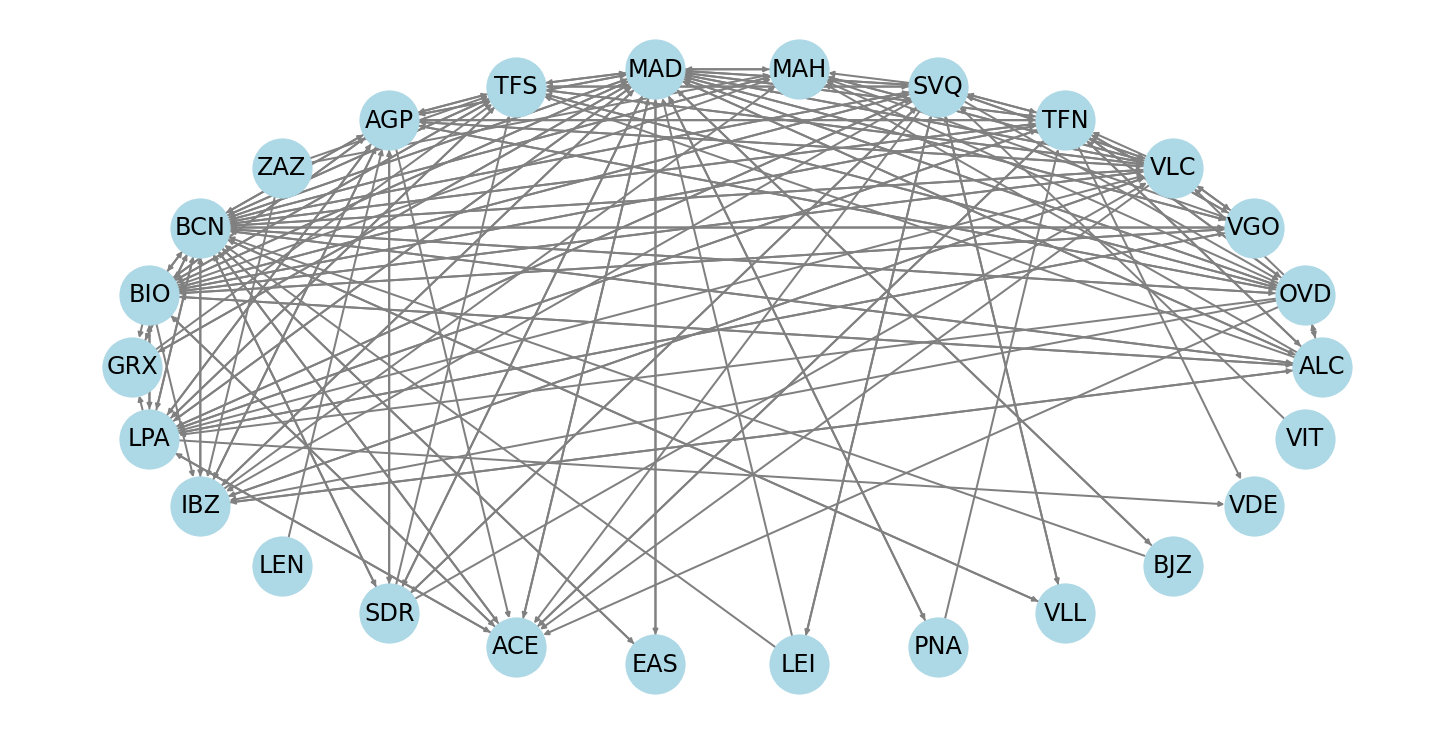

In [11]:
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=24,
                 width=2, with_labels=True, node_size=3500,
)

In [12]:
list(nx.all_shortest_paths(DG, source="PNA", target="VLL", weight=None))

[['PNA', 'TFN', 'BCN', 'VLL'],
 ['PNA', 'MAD', 'BCN', 'VLL'],
 ['PNA', 'TFN', 'SVQ', 'VLL'],
 ['PNA', 'MAD', 'SVQ', 'VLL']]

In [13]:
# https://en.wikipedia.org/wiki/Dijkstra's_algorithm
print("Dijkstra's algorithm")
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/2/23/Dijkstras_progress_animation.gif">')

Dijkstra's algorithm


In [14]:
list(nx.dijkstra_path(DG, source="PNA", target="VLL", weight=None))

['PNA', 'TFN', 'BCN', 'VLL']

In [15]:
list(nx.dijkstra_path(DG, source="PNA", target="VLL", weight="price"))

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']

In [16]:
list(nx.dijkstra_path(DG, source="PNA", target="VLL", weight="duration"))

['PNA', 'MAD', 'SVQ', 'VLL']

In [ ]:
###########################

In [17]:
def show_path(path):
    total_price = 0
    total_duration = 0
    
    for i in range(len(path)-1):
        origin = path[i]
        destination = path[i+1]
        duration = DG[origin][destination]["duration"]
        price = DG[origin][destination]["price"]
        
        total_price = total_price+price
        total_duration = total_duration+duration
        print("    %s -> %s\n    - Duration: %s Price: %s €" % (
            iata_spain.loc[origin]["name"],
            iata_spain.loc[destination]["name"],
            duration, price)
        )
    
    print("\n     Total Duration: %s Total price: %s € \n" % (
            total_duration, total_price)
    )

In [18]:
show_path(['PNA', 'MAD', 'SVQ', 'VLL'])

    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Sevilla-San Pablo
    - Duration: 65.0 Price: 761 €
    Aeropuerto de Sevilla-San Pablo -> Aeropuerto de Villanubla
    - Duration: 75.0 Price: 71 €

     Total Duration: 200.0 Total price: 1158 € 



In [19]:
show_path(['PNA', 'MAD', 'IBZ', 'BCN', 'VLL'])

    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Ibiza
    - Duration: 80.0 Price: 45 €
    Aeropuerto de Ibiza -> Aeropuerto de Barcelona-El Prat
    - Duration: 65.0 Price: 6 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 295.0 Total price: 471 € 



In [20]:
def get_all_shortest_paths(DiGraph, origin, destination):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destination
    ))
    for weight in [None, "duration", "price"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origin,
                                          target=destination,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)

In [21]:
get_all_shortest_paths(DG, origin="PNA", destination="VLL")

*** All shortest paths - Origen: PNA Destino: VLL
* Ordenando por: None
   Camino óptimo: ['PNA', 'TFN', 'BCN', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    - Duration: 185.0 Price: 1226 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de Barcelona-El Prat
    - Duration: 205.0 Price: 185 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 480.0 Total price: 1505 € 

   Camino óptimo: ['PNA', 'MAD', 'BCN', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Barcelona-El Prat
    - Duration: 80.0 Price: 94 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 230.0 Total price: 514 € 

   Camino óptimo: ['PNA', 'TFN', 'SVQ', 'VLL']
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    - Duration: 185.0

In [22]:
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=1, with_labels=True, node_size=3500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=24,
                width=3, with_labels=True, node_size=3000
           )
    plt.show()
        
    
    

In [23]:
def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "duration", "price"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origin),
                                  (destination),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)


*** Origen: PNA Destino: VLL
 Ordenado por: None
   Camino óptimo: ['PNA', 'TFN', 'BCN', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto de Tenerife Norte
    - Duration: 185.0 Price: 1226 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de Barcelona-El Prat
    - Duration: 205.0 Price: 185 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 480.0 Total price: 1505 € 

['PNA', 'TFN', 'BCN', 'VLL']


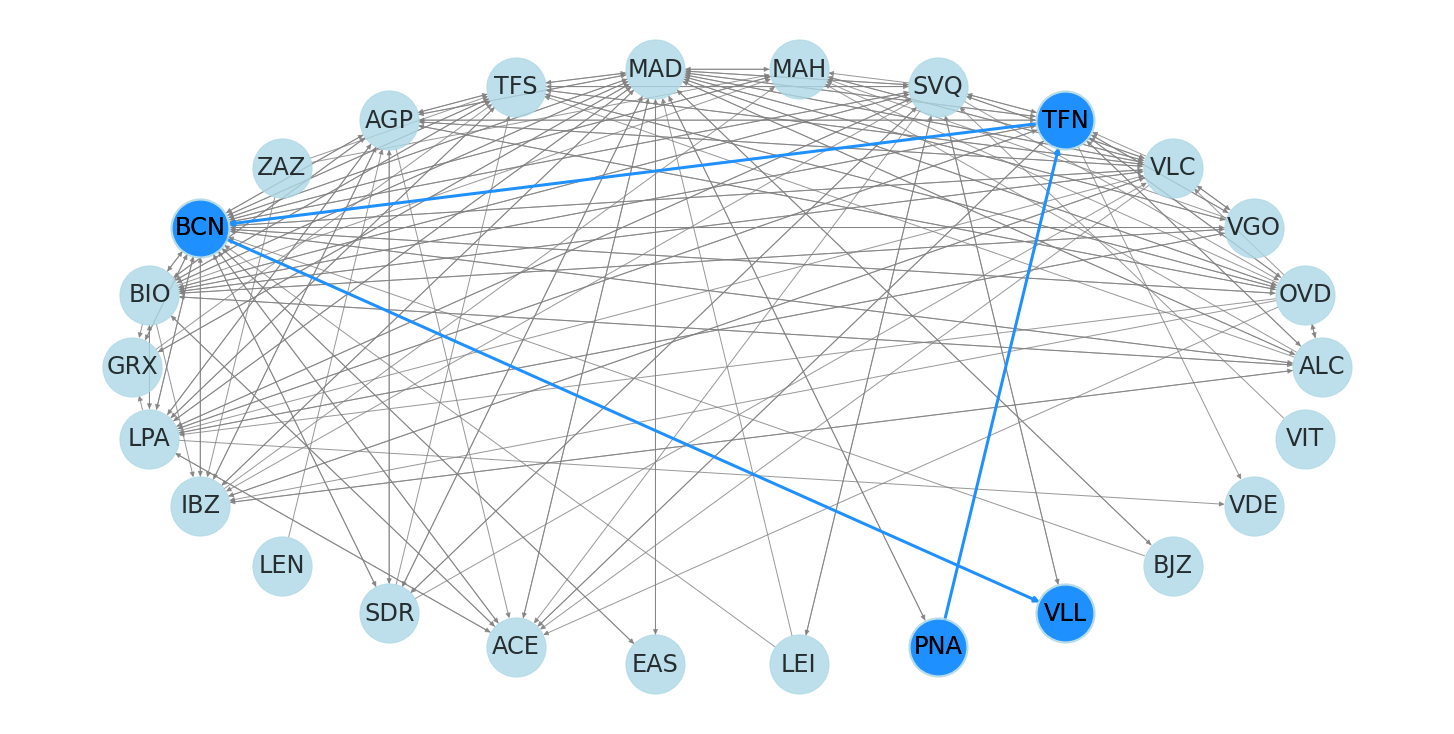

 Ordenado por: duration
   Camino óptimo: ['PNA', 'MAD', 'SVQ', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Sevilla-San Pablo
    - Duration: 65.0 Price: 761 €
    Aeropuerto de Sevilla-San Pablo -> Aeropuerto de Villanubla
    - Duration: 75.0 Price: 71 €

     Total Duration: 200.0 Total price: 1158 € 

['PNA', 'MAD', 'SVQ', 'VLL']


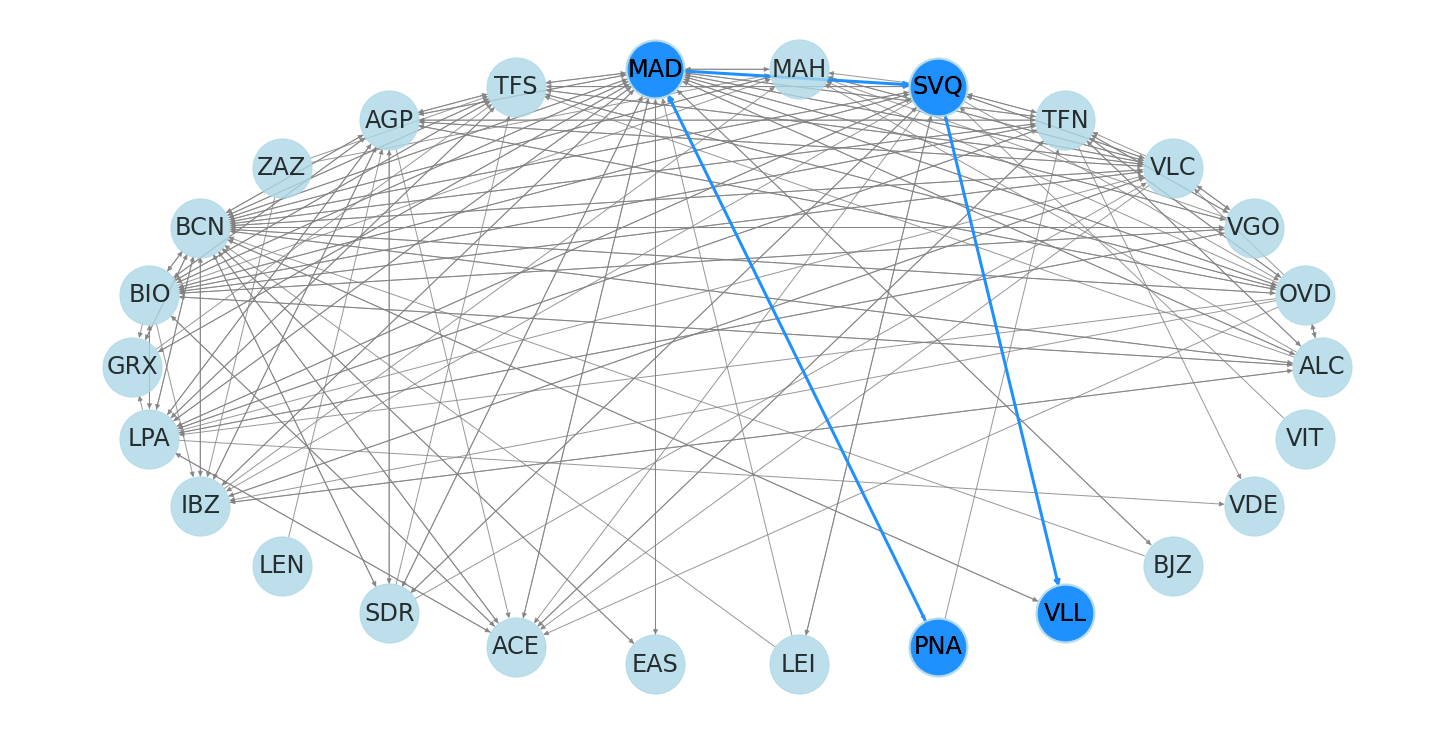

 Ordenado por: price
   Camino óptimo: ['PNA', 'MAD', 'IBZ', 'BCN', 'VLL'] 
    Aeropuerto de Pamplona -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 60.0 Price: 326 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Ibiza
    - Duration: 80.0 Price: 45 €
    Aeropuerto de Ibiza -> Aeropuerto de Barcelona-El Prat
    - Duration: 65.0 Price: 6 €
    Aeropuerto de Barcelona-El Prat -> Aeropuerto de Villanubla
    - Duration: 90.0 Price: 94 €

     Total Duration: 295.0 Total price: 471 € 

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']


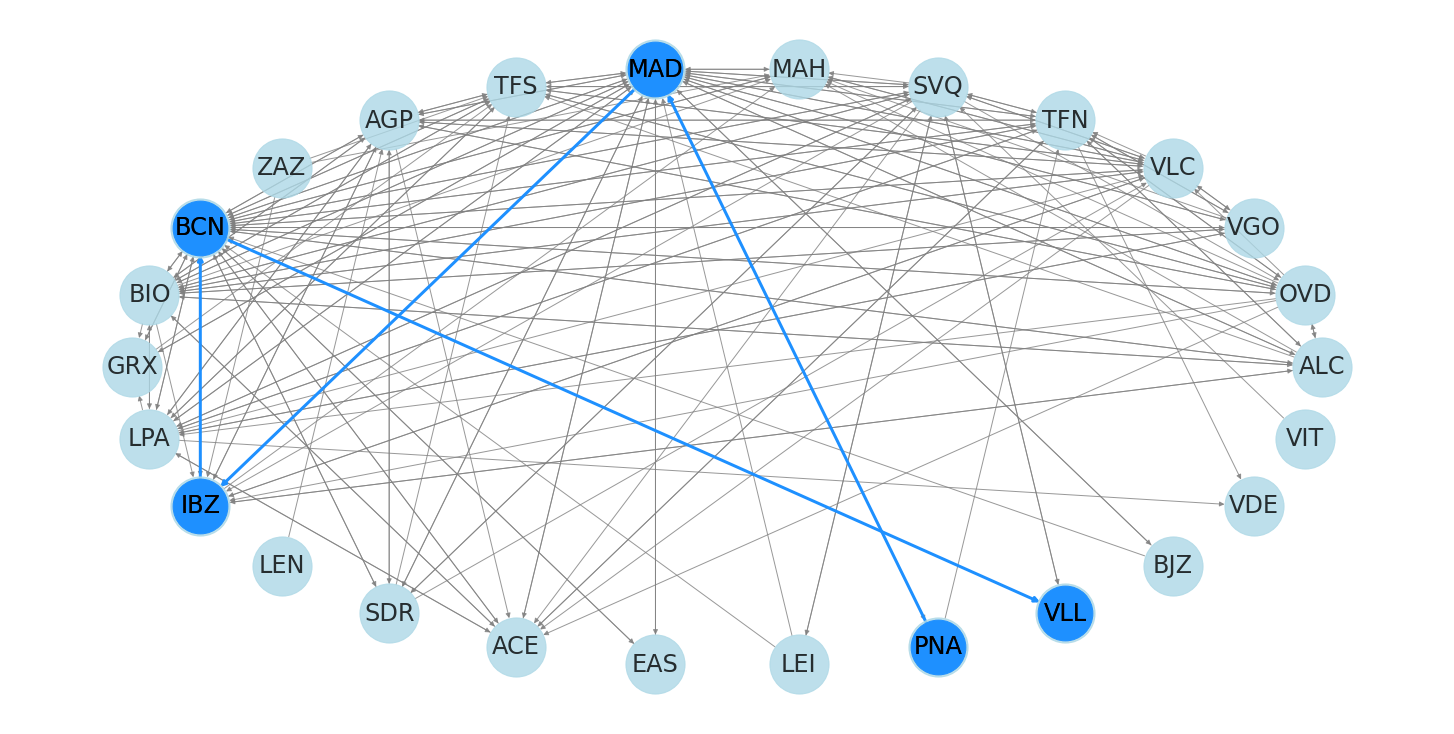

In [24]:
get_shortest_path(DG, origin="PNA", destination="VLL")

['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']


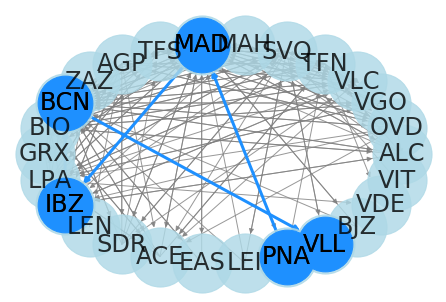

In [28]:
path = ['PNA', 'MAD', 'IBZ', 'BCN', 'VLL']
plot_shortest_path(path)

*** Origen: LEN Destino: BJZ
 Ordenado por: None
   Camino óptimo: ['LEN', 'AGP', 'MAD', 'BJZ'] 
    Aeropuerto de León -> Aeropuerto de Málaga-Costa del Sol
    - Duration: 85.0 Price: 496 €
    Aeropuerto de Málaga-Costa del Sol -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 90.0 Price: 108 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Badajoz
    - Duration: 65.0 Price: 234 €

     Total Duration: 240.0 Total price: 838 € 

['LEN', 'AGP', 'MAD', 'BJZ']


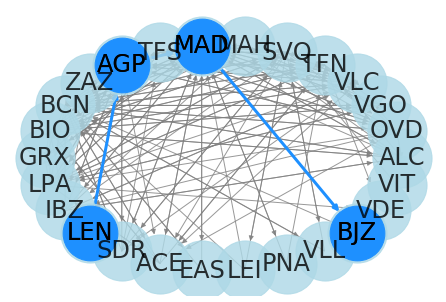

 Ordenado por: duration
   Camino óptimo: ['LEN', 'AGP', 'MAD', 'BJZ'] 
    Aeropuerto de León -> Aeropuerto de Málaga-Costa del Sol
    - Duration: 85.0 Price: 496 €
    Aeropuerto de Málaga-Costa del Sol -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 90.0 Price: 108 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Badajoz
    - Duration: 65.0 Price: 234 €

     Total Duration: 240.0 Total price: 838 € 

['LEN', 'AGP', 'MAD', 'BJZ']


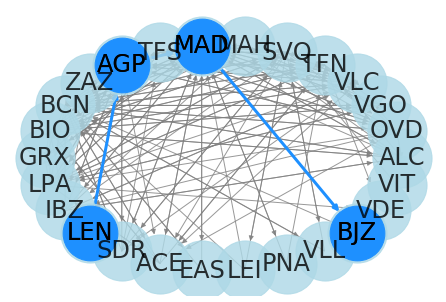

 Ordenado por: price
   Camino óptimo: ['LEN', 'AGP', 'MAD', 'BJZ'] 
    Aeropuerto de León -> Aeropuerto de Málaga-Costa del Sol
    - Duration: 85.0 Price: 496 €
    Aeropuerto de Málaga-Costa del Sol -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 90.0 Price: 108 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Badajoz
    - Duration: 65.0 Price: 234 €

     Total Duration: 240.0 Total price: 838 € 

['LEN', 'AGP', 'MAD', 'BJZ']


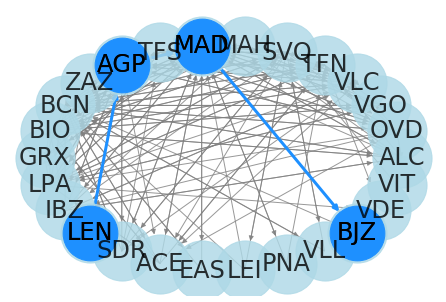

In [28]:
get_shortest_path(DG, origin="LEN", destination="BJZ")

*** Origen: GRX Destino: VDE
 Ordenado por: None
   Camino óptimo: ['GRX', 'TFS', 'LPA', 'VDE'] 
    Aeropuerto Federico García Lorca Granada -> Aeropuerto Internacional Reina Sofía
    - Duration: 150.0 Price: 581 €
    Aeropuerto Internacional Reina Sofía -> Aeropuerto de Gran Canaria
    - Duration: 35.0 Price: 79 €
    Aeropuerto de Gran Canaria -> Aeropuerto de los Cangrejos
    - Duration: 55.0 Price: 200 €

     Total Duration: 240.0 Total price: 860 € 

['GRX', 'TFS', 'LPA', 'VDE']


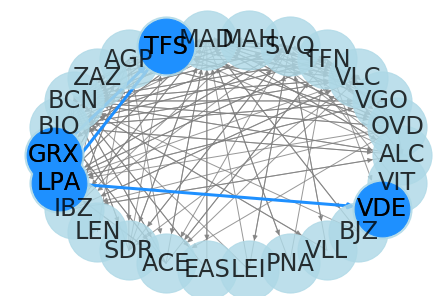

 Ordenado por: duration
   Camino óptimo: ['GRX', 'TFS', 'LPA', 'VDE'] 
    Aeropuerto Federico García Lorca Granada -> Aeropuerto Internacional Reina Sofía
    - Duration: 150.0 Price: 581 €
    Aeropuerto Internacional Reina Sofía -> Aeropuerto de Gran Canaria
    - Duration: 35.0 Price: 79 €
    Aeropuerto de Gran Canaria -> Aeropuerto de los Cangrejos
    - Duration: 55.0 Price: 200 €

     Total Duration: 240.0 Total price: 860 € 

['GRX', 'TFS', 'LPA', 'VDE']


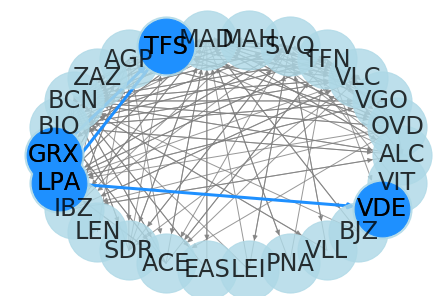

 Ordenado por: price
   Camino óptimo: ['GRX', 'MAD', 'TFN', 'VDE'] 
    Aeropuerto Federico García Lorca Granada -> Aeropuerto Adolfo Suárez Madrid-Barajas
    - Duration: 65.0 Price: 97 €
    Aeropuerto Adolfo Suárez Madrid-Barajas -> Aeropuerto de Tenerife Norte
    - Duration: 175.0 Price: 46 €
    Aeropuerto de Tenerife Norte -> Aeropuerto de los Cangrejos
    - Duration: 40.0 Price: 211 €

     Total Duration: 280.0 Total price: 354 € 

['GRX', 'MAD', 'TFN', 'VDE']


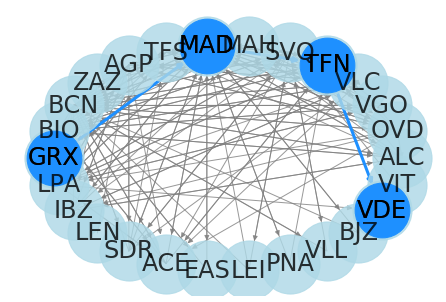

In [29]:
get_shortest_path(DG, origin="GRX", destination="VDE")